In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score#精确性分数

In [14]:
#读取数据
train = pd.read_csv('G:/机器学习算法/Breast-Cancer/breast-cancer-train.csv')
test = pd.read_csv('G:/机器学习算法/Breast-Cancer/breast-cancer-test.csv')

#构建测试集训练特征
test_positive = test.loc[test['Type'] == 0][['Clump Thickness','Cell Size']] #正样本训练特征
test_negative = test.loc[test['Type'] == 1][['Clump Thickness','Cell Size']] #负样本训练特征

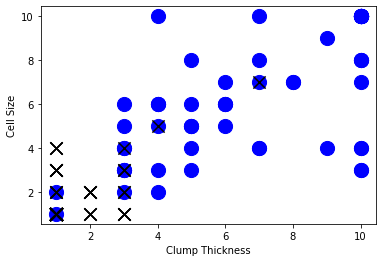

In [15]:
#绘制正负样本分布散点图
plt.scatter(test_negative['Clump Thickness'],test_negative['Cell Size'],marker='o',s=200,c='blue')
plt.scatter(test_positive['Clump Thickness'],test_positive['Cell Size'],marker='x',s=150,c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [16]:
#2.训练10条得到的
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() #生成模型
model.fit(train[['Clump Thickness','Cell Size']][:10],train['Type'][:10]) #训练模型
print(model.score(test[['Clump Thickness','Cell Size']],test['Type']))

0.8342857142857143


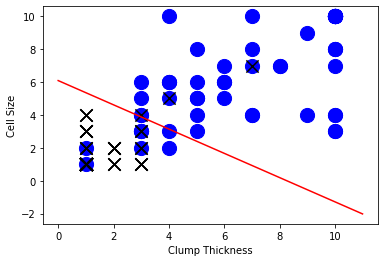

In [17]:
#绘制使用逻辑回归训练前10条样本得到的分类直线 正确率约为83.4%
#直线参数由算法生成
intercept1 = model.intercept_
coef1 = model.coef_[0,:]
lx = np.arange(0,12) #x轴
ly = (-intercept -lx * coef[0])/coef[1] 

plt.scatter(test_negative['Clump Thickness'],test_negative['Cell Size'],marker='o',s=200,c='blue')
plt.scatter(test_positive['Clump Thickness'],test_positive['Cell Size'],marker='x',s=150,c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size') 
plt.plot(lx,ly,c='red')
plt.show()

In [18]:
print(coef1)

[0.4915441  0.53242585]


0.9371428571428572


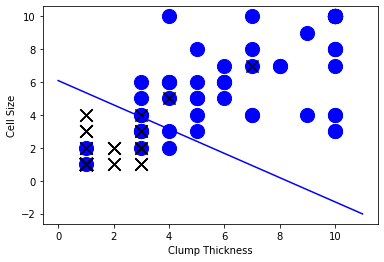

In [22]:
model = LogisticRegression()
model.fit(train[['Clump Thickness','Cell Size']],train['Type'])
print (model.score(test[['Clump Thickness','Cell Size']],test['Type']))

intercept = model.intercept_
coef = model.coef_[0,:]
lx = np.arange(0,12) #x轴
ly = (-intercept -lx * coef[0])/coef[1]

plt.scatter(test_negative['Clump Thickness'],test_negative['Cell Size'],marker='o',s=200,c='blue')
plt.scatter(test_positive['Clump Thickness'],test_positive['Cell Size'],marker='x',s=150,c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size') 
plt.plot(lx,ly,c='blue')   
plt.show() 

In [20]:
print(coef)

[0.6661098  0.90345147]


In [23]:
# 根据官方数据构建类别
column_names = ['Sample code number','Clump Thickness','Uniformity of Cell Size',
                'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
                'Normal Nucleoli','Mitoses','Class']
#读入数据（数据来源于网络）
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                   names = column_names)

In [24]:
data.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [25]:
# 将？替换成标准缺失值表示
data = data.replace(to_replace='?',value = np.nan)

In [26]:
data.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [27]:
# 丢弃带有缺失值的数据（只要一个维度有缺失）
data = data.dropna(how='any')
data.shape
#处理的缺失值后的样本共有683条，特征包括细胞厚度、细胞大小、形状等九个维度

(683, 11)

In [28]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(data[column_names[1:10]],data[column_names[10]]#第10列的分类结果作为目标分类变量
                                                 ,test_size=0.25,random_state=42)
# 查看训练和测试样本的数量和类别分布
y_train.value_counts()

2    341
4    171
Name: Class, dtype: int64

In [33]:
y_test.value_counts()

2    103
4     68
Name: Class, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler#标准化
from sklearn.linear_model import LogisticRegression#LR
from sklearn.linear_model import SGDClassifier#从sklearn.linear_model导入SGDClassifier（随机梯度参数）

In [33]:
# 标准化数据，保证每个维度的特征数据方差为1，均值为0。使得预测结果不会被某些维度过大的特征值而主导
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [69]:
#模型初始化
lr = LogisticRegression()

lr.fit(X_train,y_train)
lr_y_predict = lr.predict(X_test)
lr.fit(X_train,y_train)
#调用随机梯度的fit函数训练模型
sgdc.fit(X_train,y_train)
#使用训练好的模型sgdc对X_test进行预测，结果储存在变量sgdc_y_predict中
sgdc_y_predict = sgdc.predict(X_test)

In [47]:
lr_y_predict

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2], dtype=int64)

In [70]:
sgdc_y_predict

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4], dtype=int64)

In [73]:
#从sklearn.metrics导入classification_report
from sklearn.metrics import classification_report
 

print('Accuracy of LR Classifier:',lr.score(X_test,y_test))
print(classification_report(y_test,lr_y_predict,target_names=['Benign','Malignant']))

Accuracy of LR Classifier: 0.9532163742690059
              precision    recall  f1-score   support

      Benign       0.94      0.99      0.96       103
   Malignant       0.98      0.90      0.94        68

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [72]:
#使用随机梯度下降模型自带的评分函数score获得模型在测试集上的准确性结果
print('Accuarcy of SGD Classifier:',sgdc.score(X_test,y_test))
##使用classification_report模块获得随机梯度下降模型其他三个指标的结果
print(classification_report(y_test,sgdc_y_predict,target_names=['Benign','Malignant']))

Accuarcy of SGD Classifier: 0.9941520467836257
              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00       103
   Malignant       0.99      1.00      0.99        68

    accuracy                           0.99       171
   macro avg       0.99      1.00      0.99       171
weighted avg       0.99      0.99      0.99       171

